Major points:

- In order to be able to assess the quality of the mitochondrial sequencing results, the mitochondrial haplotypes of the individual persons should be listed in the Suppl. Materials, indicating the haplogroup. In addition, a quality check should be carried out, e.g. in the EMPOP database. It would be very interesting to analyze whether there is a haplogroup dependency of the occurrence of somatic mutations.

- сделать extended Fisher test для гаплогрупп (Константин) и визуализацию (с Богданом)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from matplotlib.colors import LinearSegmentedColormap

blue_red_cmap = LinearSegmentedColormap.from_list("BlueRed", ["blue", "red"])
plt.colormaps.register(cmap=blue_red_cmap)

blue_red_cmap = LinearSegmentedColormap.from_list("BlueOrange", ["blue", "darkorange"])
plt.colormaps.register(cmap=blue_red_cmap)

In [174]:
blue_red_cmap = LinearSegmentedColormap.from_list("BlueOrange2", ["blue", "orangered"])
plt.colormaps.register(cmap=blue_red_cmap)

In [2]:
df_hap = pd.read_csv('../data/Suplementary_File_S2_Haplogroups.tsv', sep='\t', index_col=0).dropna()
nsamples = len(df_hap)
df_hap

,Haplogroup,ContaminationStatus,ContaminationLevel,Distance,SampleCoverage
Patient,,,,,
7,H5b,NO,ND,8.0,145.0
10,U5b1a*,NO,ND,14.0,31.0
12,H11a2a2,NO,ND,11.0,73.0
16,H1,NO,ND,6.0,74.0
17,H,NO,ND,5.0,84.0
...,...,...,...,...,...
402,W6a,NO,ND,14.0,39.0
405,U5a2a1,NO,ND,16.0,188.0
407,G1b1*,NO,ND,16.0,228.0


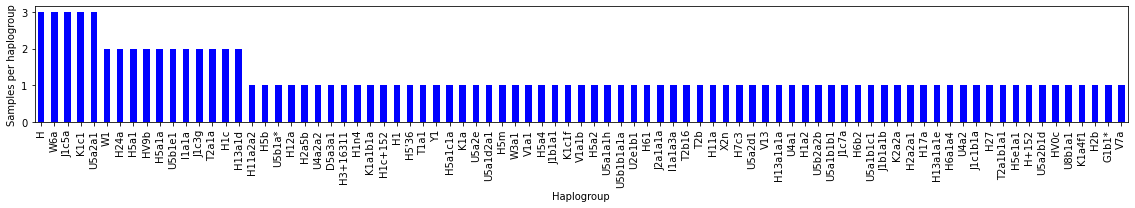

In [3]:
hap_cnt = df_hap.Haplogroup.value_counts()

hap_cnt.plot(kind='bar', figsize=(16, 3), color='blue')
plt.ylabel('Samples per haplogroup')
plt.xlabel('Haplogroup')
plt.tight_layout()
plt.show()

In [4]:
df_mut = pd.read_excel('../data/Suplementary_File_S1_Clinical_data_of_Osteoarthritic_cohort.xlsx', 
              sheet_name='Data', index_col=0)
df_mut['mut_T408A'] = (df_mut['SNP_position'] == '408.0') & (df_mut['SNP_type'] == 'T>A')
df_mut['mut_A189G'] = (df_mut['SNP_position'] == '189.0') & (df_mut['SNP_type'] == 'A>G')
df_mut

,Age,Gender,Weight,Height,Blood_type,Rh_factor,Systolic_BP,Diastolic_BP,Heart_rate,Red_blood_cells,...,SNP_position,SNP_type,allele_frequency,MitoHPC_filter_type,Mutation_type,mtDNA_copy_number,Arthritis_type,ICD,mut_T408A,mut_A189G
Patient_ID,,,,,,,,,,,,,,,,,,,,,
10,57,M,82.0,176,1,1,130,90.0,80.0,4.58,...,0,NaN,NaN,strict,cont2_nonCR,NaN,primary,"M16, I10.0",False,False
10,57,M,82.0,176,1,1,130,90.0,80.0,4.58,...,0,NaN,NaN,loose,cont2_nonCR,NaN,primary,"M16, I10.0",False,False
101,80,F,85.0,167,2,1,120,80.0,86.0,4.02,...,408.0,T>A,0.029351,loose,exp_data,249.3968,primary,"M17, K29.9",True,False
101,80,F,85.0,167,2,1,120,80.0,86.0,4.02,...,189.0,A>G,0.070369,loose,exp_data,249.3968,primary,"M17, K29.9",False,True
101,80,F,85.0,167,2,1,120,80.0,86.0,4.02,...,408.0,T>A,0.029351,strict,exp_data,249.3968,primary,"M17, K29.9",True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,57,M,125.0,187,3,1,125,90.0,70.0,5.55,...,NaN,NaN,NaN,NaN,NaN,NaN,primary,"M16, K29.6",False,False
94,38,F,58.0,171,2,1,120,80.0,82.0,3.58,...,189.0,A>G,0.261817,loose,exp_data,279.9832,post-traumatic,M16,False,True
94,38,F,58.0,171,2,1,120,80.0,82.0,3.58,...,189.0,A>G,0.261817,strict,exp_data,279.9832,post-traumatic,M16,False,True


In [5]:
carriers_408_loose = df_mut[(df_mut.MitoHPC_filter_type == 'loose') & (df_mut.mut_T408A)]
carriers_189_loose = df_mut[(df_mut.MitoHPC_filter_type == 'loose') & (df_mut.mut_A189G)]

carriers_408_strict = df_mut[(df_mut.MitoHPC_filter_type == 'strict') & (df_mut.mut_T408A)]
carriers_189_strict = df_mut[(df_mut.MitoHPC_filter_type == 'strict') & (df_mut.mut_A189G)]

carriers_189_loose.shape, carriers_189_strict.shape, carriers_408_loose.shape, carriers_408_strict.shape

((56, 49), (41, 49), (43, 49), (39, 49))

## Loose mitohpc filter

In [6]:
df_hap['mut_T408A'] = df_hap.index.isin(carriers_408_loose.index)
df_hap['mut_A189G'] = df_hap.index.isin(carriers_189_loose.index)

In [7]:
df_mut_in_hap = df_hap.groupby('mut_T408A').Haplogroup.value_counts().unstack().fillna(0).astype(int)
df_mut_in_hap

Haplogroup,D5a3a1,G1b1*,H,H+152,H1,H11a,H11a2a2,H12a,H13a1a1a,H13a1a1e,...,U8b1a1,V13,V1a1,V1a1b,V7a,W1,W3a1,W6a,X2n,Y1
mut_T408A,,,,,,,,,,,,,,,,,,,,,
False,0,1,2,0,0,1,1,1,1,0,...,1,1,0,0,0,1,1,3,0,0
True,1,0,1,1,1,0,0,0,0,1,...,0,0,1,1,1,1,0,0,1,1


Chi-square statistic: 93.00393950946753
P-value: 0.19075663165666057
Degrees of freedom: 82


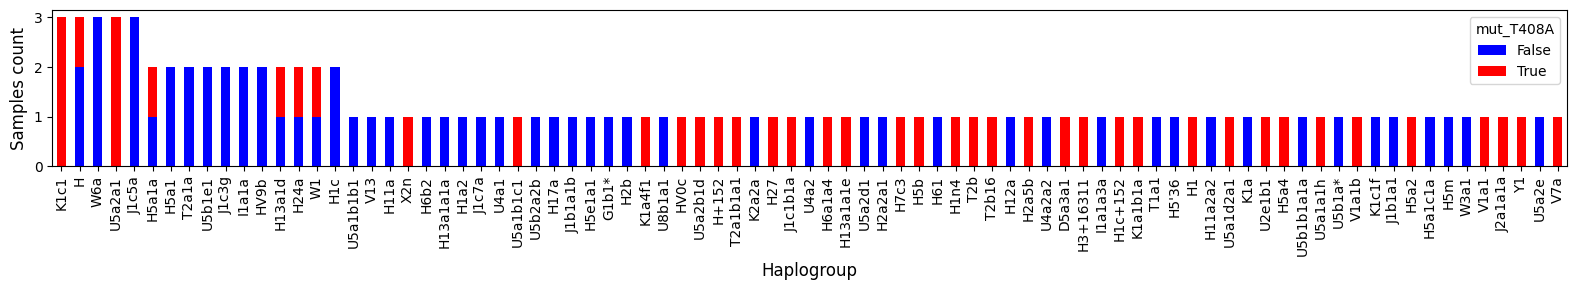

In [51]:
df_mut_in_hap = df_hap.groupby('mut_T408A').Haplogroup.value_counts().unstack().fillna(0).astype(int)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(df_mut_in_hap)

# Display results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Plot the stacked bar plot
df_mut_in_hap.T.loc[df_hap.Haplogroup.value_counts().index]\
    .plot(kind='bar', stacked=True, figsize=(16, 3), colormap='BlueRed')
plt.ylabel('Samples count', fontsize=12)
plt.xlabel('Haplogroup', fontsize=12)
# plt.title('Stacked Bar Plot of Haplogroups by Mutation Status')
plt.tight_layout()
plt.show()

In [8]:
# https://haplogrep.i-med.ac.at/phylogenies/phylotree-fu-rcrs@1.2/mutations/408_T_A
# https://haplogrep.i-med.ac.at/phylogenies/phylotree-fu-rcrs@1.2/mutations/189_A_G

df_mut_in_hap[['H', ]]

Haplogroup,H
mut_T408A,
False,2
True,1


Chi-square statistic: 86.56349206349205
P-value: 0.34391695093599867
Degrees of freedom: 82


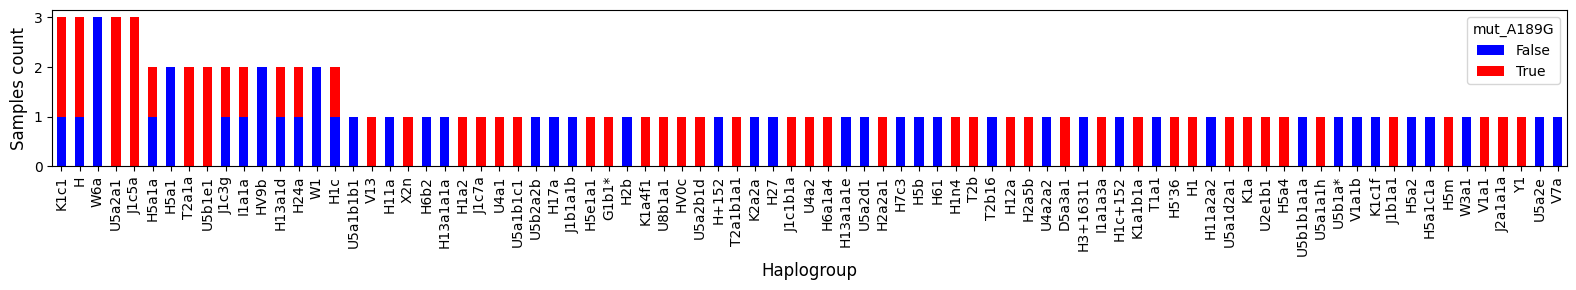

In [55]:
df_mut_in_hap = df_hap.groupby('mut_A189G').Haplogroup.value_counts().unstack().fillna(0).astype(int)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(df_mut_in_hap)

# Display results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Plot the stacked bar plot
df_mut_in_hap.T.loc[df_hap.Haplogroup.value_counts().index]\
    .plot(kind='bar', stacked=True, figsize=(16, 3), colormap='BlueRed')
plt.ylabel('Samples count', fontsize=12)
plt.xlabel('Haplogroup', fontsize=12)
# plt.title('Stacked Bar Plot of Haplogroups by Mutation Status')
plt.tight_layout()
plt.show()

In [67]:
df_mut_in_hap = df_hap.groupby('mut_T408A').Haplogroup.value_counts().unstack().fillna(0).astype(int)

nsamples_cutoff = 1
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_cnt[hap_cnt>nsamples_cutoff].index])

print('mut_T408A')
print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}\n")

nsamples_cutoff = 2
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_cnt[hap_cnt>nsamples_cutoff].index])

print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

mut_T408A
Nsamples cutoff: 1
Chi-square statistic: 24.23543123543123
P-value: 0.06120179786831087
Degrees of freedom: 15

Nsamples cutoff: 2
Chi-square statistic: 12.321428571428573
P-value: 0.015114442291091983
Degrees of freedom: 4


In [68]:
df_mut_in_hap = df_hap.groupby('mut_A189G').Haplogroup.value_counts().unstack().fillna(0).astype(int)

nsamples_cutoff = 1
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_cnt[hap_cnt>nsamples_cutoff].index])

print('mut_A189G')
print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}\n")

nsamples_cutoff = 2
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_cnt[hap_cnt>nsamples_cutoff].index])

print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

mut_A189G
Nsamples cutoff: 1
Chi-square statistic: 22.739583333333332
P-value: 0.08982767432634124
Degrees of freedom: 15

Nsamples cutoff: 2
Chi-square statistic: 6.666666666666667
P-value: 0.1545873045047604
Degrees of freedom: 4


## Strict mitohpc filter

In [71]:
df_hap['mut_T408A'] = df_hap.index.isin(carriers_408_strict.index)
df_hap['mut_A189G'] = df_hap.index.isin(carriers_189_strict.index)

Chi-square statistic: 92.62222222222223
P-value: 0.19830982121108268
Degrees of freedom: 82


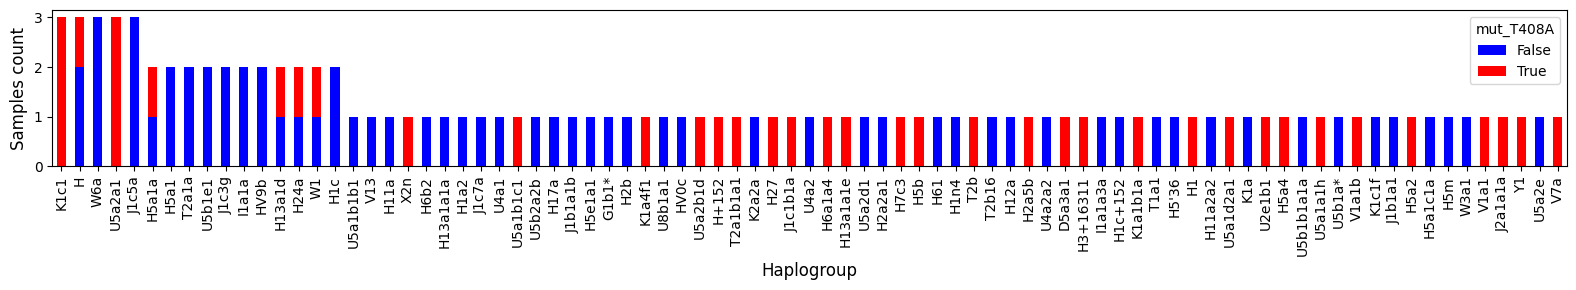

In [73]:
df_mut_in_hap = df_hap.groupby('mut_T408A').Haplogroup.value_counts().unstack().fillna(0).astype(int)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(df_mut_in_hap)

# Display results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Plot the stacked bar plot
df_mut_in_hap.T.loc[df_hap.Haplogroup.value_counts().index]\
    .plot(kind='bar', stacked=True, figsize=(16, 3), colormap='BlueRed')
plt.ylabel('Samples count', fontsize=12)
plt.xlabel('Haplogroup', fontsize=12)
# plt.title('Stacked Bar Plot of Haplogroups by Mutation Status')
plt.tight_layout()
plt.show()

In [74]:
# https://haplogrep.i-med.ac.at/phylogenies/phylotree-fu-rcrs@1.2/mutations/408_T_A
# https://haplogrep.i-med.ac.at/phylogenies/phylotree-fu-rcrs@1.2/mutations/189_A_G

df_mut_in_hap[['H', ]]

Haplogroup,H
mut_T408A,
False,2
True,1


Chi-square statistic: 89.34417344173443
P-value: 0.27129008473362026
Degrees of freedom: 82


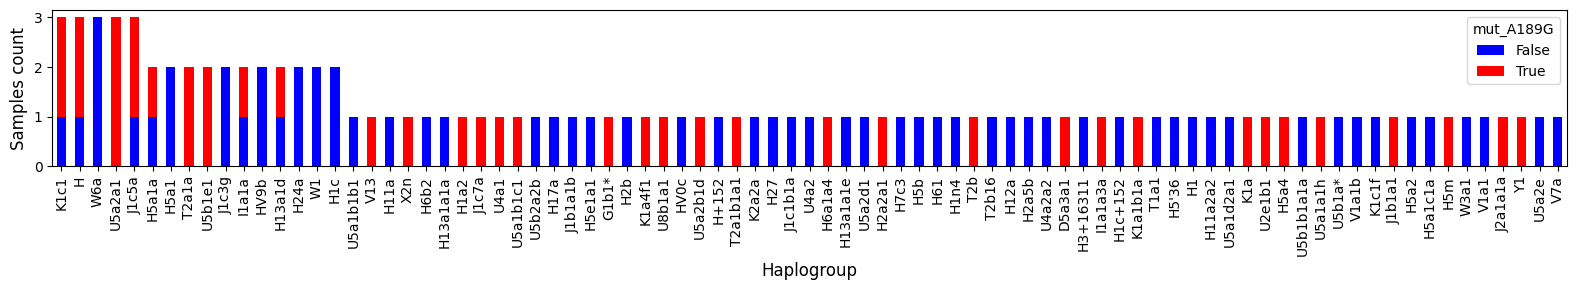

In [75]:
df_mut_in_hap = df_hap.groupby('mut_A189G').Haplogroup.value_counts().unstack().fillna(0).astype(int)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(df_mut_in_hap)

# Display results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Plot the stacked bar plot
df_mut_in_hap.T.loc[df_hap.Haplogroup.value_counts().index]\
    .plot(kind='bar', stacked=True, figsize=(16, 3), colormap='BlueRed')
plt.ylabel('Samples count', fontsize=12)
plt.xlabel('Haplogroup', fontsize=12)
# plt.title('Stacked Bar Plot of Haplogroups by Mutation Status')
plt.tight_layout()
plt.show()

In [76]:
df_mut_in_hap = df_hap.groupby('mut_T408A').Haplogroup.value_counts().unstack().fillna(0).astype(int)

nsamples_cutoff = 1
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_cnt[hap_cnt>nsamples_cutoff].index])

print('mut_T408A')
print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}\n")

nsamples_cutoff = 2
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_cnt[hap_cnt>nsamples_cutoff].index])

print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

mut_T408A
Nsamples cutoff: 1
Chi-square statistic: 24.23543123543123
P-value: 0.06120179786831087
Degrees of freedom: 15

Nsamples cutoff: 2
Chi-square statistic: 12.321428571428573
P-value: 0.015114442291091983
Degrees of freedom: 4


In [77]:
df_mut_in_hap = df_hap.groupby('mut_A189G').Haplogroup.value_counts().unstack().fillna(0).astype(int)

nsamples_cutoff = 1
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_cnt[hap_cnt>nsamples_cutoff].index])

print('mut_A189G')
print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}\n")

nsamples_cutoff = 2
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_cnt[hap_cnt>nsamples_cutoff].index])

print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

mut_A189G
Nsamples cutoff: 1
Chi-square statistic: 22.739583333333332
P-value: 0.08982767432634124
Degrees of freedom: 15

Nsamples cutoff: 2
Chi-square statistic: 6.666666666666667
P-value: 0.1545873045047604
Degrees of freedom: 4


## Apply binomtest

In [101]:
from scipy.stats import binomtest

# Example: Testing if a coin is fair
# Suppose we flip a coin 100 times and get 60 heads
n = 100  # Total number of trials
k = 61   # Number of successes (heads)
p = 0.5  # Null hypothesis: probability of success (fair coin)

# Perform the binomial test
result = binomtest(k, n, p)

# Display the results
print(f"p-value: {result.pvalue}")

p-value: 0.03520020021770479


In [102]:
binomtest(0, 15, 0.2).pvalue

np.float64(0.05324317907353598)

In [105]:
binomtest(10, 40, 0.2).pvalue

np.float64(0.4295517029406807)

# Major haplogroups
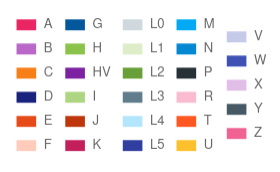

## Loose mitohpc filter

In [61]:
def extract_major_haplogroups(x: str):
    if x.startswith('L') or x.startswith('HV') or x.startswith('JT') or x.startswith('CZ'):
        mh = x[:2] 
    else:
        mh = x[0]
    return mh

df_hap.Haplogroup.apply(extract_major_haplogroups).value_counts()

Haplogroup
H     40
U     20
J     10
K      8
T      6
W      6
V      4
HV     3
I      3
D      1
Y      1
X      1
G      1
Name: count, dtype: int64

In [62]:
df_hap['Haplogroup_major'] = df_hap.Haplogroup.apply(extract_major_haplogroups)
hap_major_cnt = df_hap.Haplogroup_major.value_counts()

In [63]:
df_hap['mut_T408A'] = df_hap.index.isin(carriers_408_loose.index)
df_hap['mut_A189G'] = df_hap.index.isin(carriers_189_loose.index)

In [64]:
df_mut_in_hap = df_hap.groupby('mut_T408A').Haplogroup_major.value_counts().unstack().fillna(0).astype(int)
df_mut_in_hap

Haplogroup_major,D,G,H,HV,I,J,K,T,U,V,W,X,Y
mut_T408A,,,,,,,,,,,,,
False,0,1,23,2,3,8,3,3,12,1,5,0,0
True,1,0,17,1,0,2,5,3,8,3,1,1,1


mut_T408A
Chi-square statistic: 14.107205489897067
P-value: 0.2939147982211329
Degrees of freedom: 12

mut_A189G
Chi-square statistic: 17.62222222222222
P-value: 0.12765186710153514
Degrees of freedom: 12


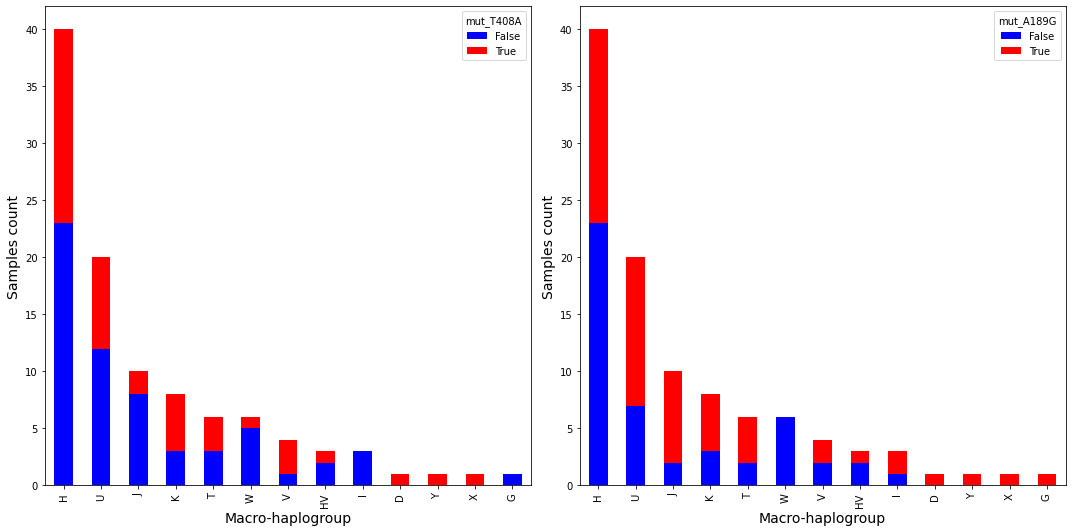

In [65]:
df_mut_in_hap = df_hap.groupby('mut_T408A').Haplogroup_major.value_counts().unstack().fillna(0).astype(int)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(df_mut_in_hap)

# Display results
print("mut_T408A")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Plot the stacked bar plot
ax = plt.subplot(121)
df_mut_in_hap.T.loc[df_hap.Haplogroup_major.value_counts().index]\
    .plot(kind='bar', stacked=True, figsize=(15, 7.5), colormap='BlueRed', ax=ax)
plt.ylabel('Samples count', fontsize=14)
plt.xlabel('Macro-haplogroup', fontsize=14)
# plt.title('Stacked Bar Plot of Haplogroups by Mutation Status')

df_mut_in_hap = df_hap.groupby('mut_A189G').Haplogroup_major.value_counts().unstack().fillna(0).astype(int)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(df_mut_in_hap)

# Display results
print("\nmut_A189G")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Plot the stacked bar plot
ax = plt.subplot(122)
df_mut_in_hap.T.loc[df_hap.Haplogroup_major.value_counts().index]\
    .plot(kind='bar', stacked=True, figsize=(15, 7.5), colormap='BlueRed', ax=ax)
plt.ylabel('Samples count', fontsize=14)
plt.xlabel('Macro-haplogroup', fontsize=14)
# plt.title('Stacked Bar Plot of Haplogroups by Mutation Status')

plt.tight_layout()
plt.show()

In [50]:
df_mut_in_hap = df_hap.groupby('mut_T408A').Haplogroup_major.value_counts().unstack().fillna(0).astype(int)

nsamples_cutoff = 1
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_major_cnt[hap_major_cnt>nsamples_cutoff].index])

print('mut_T408A')
print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}\n")

nsamples_cutoff = 2
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_major_cnt[hap_major_cnt>nsamples_cutoff].index])

print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

mut_T408A
Nsamples cutoff: 1
Chi-square statistic: 9.166666666666664
P-value: 0.3284319509891128
Degrees of freedom: 8

Nsamples cutoff: 2
Chi-square statistic: 9.166666666666664
P-value: 0.3284319509891128
Degrees of freedom: 8


In [52]:
df_mut_in_hap = df_hap.groupby('mut_A189G').Haplogroup_major.value_counts().unstack().fillna(0).astype(int)

nsamples_cutoff = 1
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_major_cnt[hap_major_cnt>nsamples_cutoff].index])

print('mut_A189G')
print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}\n")

nsamples_cutoff = 2
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_major_cnt[hap_major_cnt>nsamples_cutoff].index])

print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

mut_A189G
Nsamples cutoff: 1
Chi-square statistic: 13.995726495726496
P-value: 0.08187687156059784
Degrees of freedom: 8

Nsamples cutoff: 2
Chi-square statistic: 13.995726495726496
P-value: 0.08187687156059784
Degrees of freedom: 8


## Strict mitohpc filter

In [66]:
df_hap['mut_T408A'] = df_hap.index.isin(carriers_408_strict.index)
df_hap['mut_A189G'] = df_hap.index.isin(carriers_189_strict.index)

mut_T408A
Chi-square statistic: 16.24888888888889
P-value: 0.18010059764715072
Degrees of freedom: 12

mut_A189G
Chi-square statistic: 24.230429732868757
P-value: 0.018921466541532095
Degrees of freedom: 12


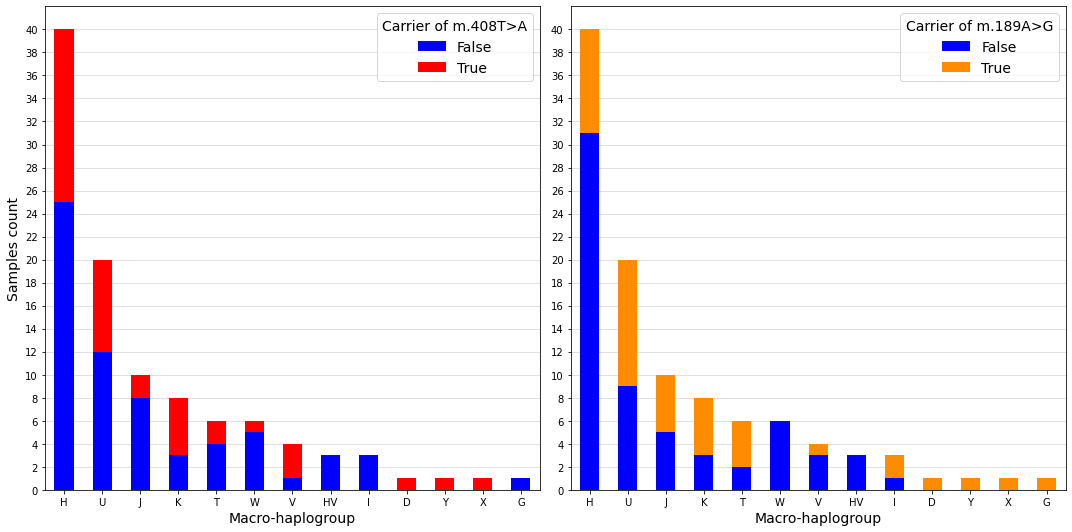

In [ ]:
df_mut_in_hap = df_hap.groupby('mut_T408A').Haplogroup_major.value_counts().unstack().fillna(0).astype(int)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(df_mut_in_hap)

# Display results
print("mut_T408A")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Plot the stacked bar plot
ax = plt.subplot(121)
df_mut_in_hap.T.loc[df_hap.Haplogroup_major.value_counts().index]\
    .plot(kind='bar', stacked=True, figsize=(15, 7.5), colormap='BlueRed', ax=ax)
plt.ylabel('Samples count', fontsize=14)
plt.xlabel('Macro-haplogroup', fontsize=14)
ax.set_axisbelow(True)
plt.xticks(rotation=0)
plt.yticks(range(0, 41, 2))
plt.grid(axis='y', color='.85')
plt.legend(fontsize=14, title='Carrier of m.408T>A', title_fontsize=14)

df_mut_in_hap = df_hap.groupby('mut_A189G').Haplogroup_major.value_counts().unstack().fillna(0).astype(int)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(df_mut_in_hap)

# Display results
print("\nmut_A189G")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Plot the stacked bar plot
ax = plt.subplot(122)
df_mut_in_hap.T.loc[df_hap.Haplogroup_major.value_counts().index]\
    .plot(kind='bar', stacked=True, figsize=(15, 7.5), colormap='BlueOrange7', ax=ax)
plt.ylabel('Samples count', fontsize=14)
plt.xlabel('Macro-haplogroup', fontsize=14)
# plt.title('Stacked Bar Plot of Haplogroups by Mutation Status')

ax.set_axisbelow(True)
plt.yticks(range(0, 41, 2))
plt.xticks(rotation=0)
plt.grid(axis='y', color='.85')
plt.legend(fontsize=14, title='Carrier of m.189A>G', title_fontsize=14)
plt.tight_layout()
plt.savefig('../figures/variants_per_haplogroups.pdf')
plt.show()

mut_T408A
Chi-square statistic: 10.734953703703706
P-value: 0.21717401548949722
Degrees of freedom: 8

mut_A189G
Chi-square statistic: 18.27541827541827
P-value: 0.019253807094718498
Degrees of freedom: 8


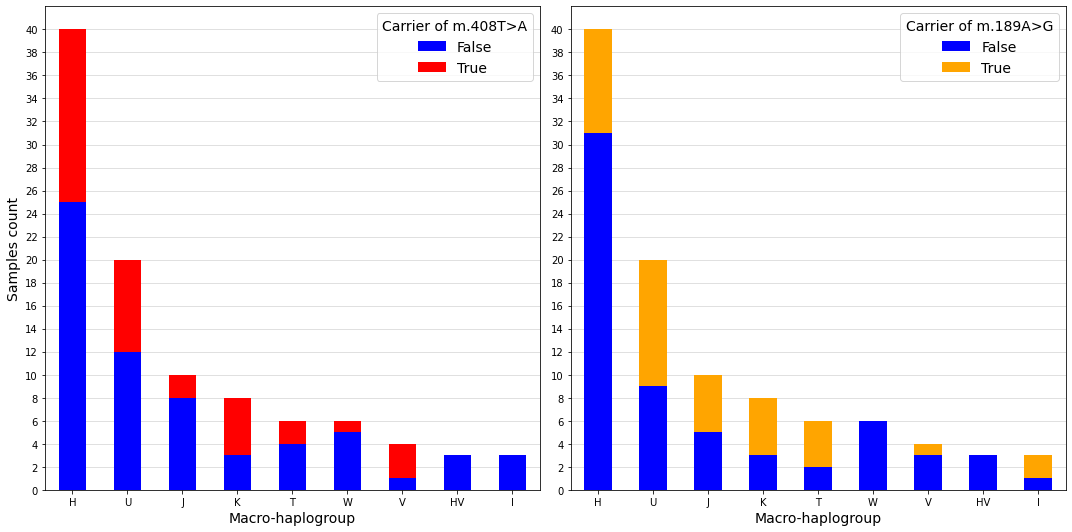

In [ ]:
# same but without low-abundant haplogriups

df_mut_in_hap = df_hap.groupby('mut_T408A').Haplogroup_major.value_counts().unstack().fillna(0).astype(int)
df_mut_in_hap = df_mut_in_hap.loc[:, df_mut_in_hap.sum(0) > 1]

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(df_mut_in_hap)

# Display results
print("mut_T408A")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Plot the stacked bar plot
ax = plt.subplot(121)
df_mut_in_hap.T.loc[df_mut_in_hap.sum(0).sort_values(ascending=False).index]\
    .plot(kind='bar', stacked=True, figsize=(15, 7.5), colormap='BlueRed', ax=ax)
plt.ylabel('Samples count', fontsize=14)
plt.xlabel('Macro-haplogroup', fontsize=14)
ax.set_axisbelow(True)
plt.xticks(rotation=0)
plt.yticks(range(0, 41, 2))
plt.grid(axis='y', color='.85')
plt.legend(fontsize=14, title='Carrier of m.408T>A', title_fontsize=14)

df_mut_in_hap = df_hap.groupby('mut_A189G').Haplogroup_major.value_counts().unstack().fillna(0).astype(int)
df_mut_in_hap = df_mut_in_hap.loc[:, df_mut_in_hap.sum(0) > 1]

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(df_mut_in_hap)

# Display results
print("\nmut_A189G")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

# Plot the stacked bar plot
ax = plt.subplot(122)
df_mut_in_hap.T.loc[df_mut_in_hap.sum(0).sort_values(ascending=False).index]\
    .plot(kind='bar', stacked=True, figsize=(15, 7.5), colormap='BlueOrange', ax=ax)
plt.ylabel('', fontsize=14)
plt.xlabel('Macro-haplogroup', fontsize=14)
# plt.title('Stacked Bar Plot of Haplogroups by Mutation Status')

ax.set_axisbelow(True)
plt.yticks(range(0, 41, 2))
plt.xticks(rotation=0)
plt.grid(axis='y', color='.85')
plt.legend(fontsize=14, title='Carrier of m.189A>G', title_fontsize=14)
plt.tight_layout()
plt.show()

In [140]:
df_mut_in_hap.sum().sum()

np.int64(104)

In [68]:
df_mut_in_hap = df_hap.groupby('mut_T408A').Haplogroup_major.value_counts().unstack().fillna(0).astype(int)

nsamples_cutoff = 1
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_major_cnt[hap_major_cnt>nsamples_cutoff].index])

print('mut_T408A')
print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}\n")

nsamples_cutoff = 2
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_major_cnt[hap_major_cnt>nsamples_cutoff].index])

print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

mut_T408A
Nsamples cutoff: 1
Chi-square statistic: 10.734953703703706
P-value: 0.21717401548949722
Degrees of freedom: 8

Nsamples cutoff: 2
Chi-square statistic: 10.734953703703706
P-value: 0.21717401548949722
Degrees of freedom: 8


In [58]:
df_mut_in_hap = df_hap.groupby('mut_A189G').Haplogroup_major.value_counts().unstack().fillna(0).astype(int)

nsamples_cutoff = 1
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_major_cnt[hap_major_cnt>nsamples_cutoff].index])

print('mut_A189G')
print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}\n")

nsamples_cutoff = 2
chi2, p, dof, expected = chi2_contingency(
    df_mut_in_hap[hap_major_cnt[hap_major_cnt>nsamples_cutoff].index])

print(f"Nsamples cutoff: {nsamples_cutoff}")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

mut_A189G
Nsamples cutoff: 1
Chi-square statistic: 18.275418275418275
P-value: 0.019253807094718498
Degrees of freedom: 8

Nsamples cutoff: 2
Chi-square statistic: 18.275418275418275
P-value: 0.019253807094718498
Degrees of freedom: 8
